In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
y_0 = np.array([1.]) # Initial condition

In [345]:
gravity_acc       = 10. # [m /s2]
mass    = 0.001 #  test mass in [kg]
damping_parameter = 0.0000089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = .009 # arbitrary spring const. not sure what this would be in reality 
R = .00009
m_0 = 0.0001 
delta_m= 0.0001
x_c = 0.150

N = 10000
t = np.linspace(0., 10., N+1) # [s] an array of time steps

In [346]:
solve_args  = {}
solve_args['k'] = spring_const
solve_args['m_0']  = m_0
solve_args['g'] = gravity_acc
solve_args['capital gamma'] = damping_parameter +R
#not applying chain rule above
solve_args['R'] = R
solve_args['m_0']  = m_0
print(solve_args['R'])
initial_pos    = 0. # [m]
initial_vel = 0.001   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

9e-05


In [347]:
def RungeKutta4_Drop(func, y_0, x, x_c, delta_m, args):
    #print(args)
    
    # Initialise the approximation array
    y = np.zeros([len(x), len(y_0)])
    #print(y.shape)
    drop_times = np.zeros([])  
    y[0] = y_0

    # Loop through the time steps, approximating this step from the prev step
    for i, x_i in enumerate(x[:-1]):
        change = 0
        h   = x[i+1] - x_i # size of the step
        #print('x_i is:{}' .format(x_i)) 
        #print('x[i+1] is: {}' .format(x[i+1])) 

        k_1 = h*func(x_i        , y[i]          ,x_c, change, args)
        k_2 = h*func(x_i + h/2. , y[i] + k_1/2. ,x_c, change, args)
        k_3 = h*func(x_i + h/2. , y[i] + k_2/2. ,x_c, change, args)
        k_4 = h*func(x_i + h    , y[i] + k_3    ,x_c, change, args)

        y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step
        #print(args)
        if y[i+1][0] < x_c: 
            #print('no change')
            #print(args)
            continue 
        elif y[i+1][0] >= x_c: 
            #print('THIS IS DROP TIMES ') 
            #print('x_i is:{}' .format(x_i)) 
            #print('x[i+1] is: {}' .format(x[i+1]))
            drop_times = np.append(drop_times, x[i+1])  
            #print('change')
            change = args['R']*x[i+1]
            h   = x[i+1] - x_i # size of the step
            
            k_1 = h*func(x_i, y[i],x_c,                  change, args)
            k_2 = h*func(x_i + h/2. , y[i] + k_1/2.,x_c, change,args)
            k_3 = h*func(x_i + h/2. , y[i] + k_2/2.,x_c, change,args)
            k_4 = h*func(x_i + h    , y[i] + k_3,   x_c, change,args)
            
            y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step
            #print(args)
            continue 
    #drop_times = np.delete(drop_times,0)
    #print(args)
    return y, drop_times 

In [348]:
def VariableMass_Oscillator_Drop(t, y,x_c,delta_m, args):
    """ A damped and forced Oscillating Droplet, described as set of two first-order ODEs.

    Args:
        m : mass equal to m_0 + Rt where R is some constant rate  
        t: Time
        y: Pendulum system vector [position,  velocity] 
        args['ka']: spring_const
        args['m_0']: initial mass
        args['gamma']: viscous damping
        args['R']: Rate of mass change 
        args['capital gamma']: gamma + R 
        args['g']: gravitational const. 

    Returns:
        dzdt: ODE vector
    """
    
    #print(args)

    dzdt = np.zeros(2)

    dzdt[0] = y[1]
    dzdt[1] = (((-1. * args['k'])/(args['m_0'] + args['R']*t - delta_ms))*y[0] - ((args['capital gamma'])/((args['m_0'] + args['R']*t - delta_m)))*y[1] + args['g']) 
    return dzdt

In [349]:
#using altered Runge Kutta 
#dropping off inside runge kutta 
solution, times = RungeKutta4_Drop(VariableMass_Oscillator_Drop, initial_cond, t, x_c, delta_m, solve_args)


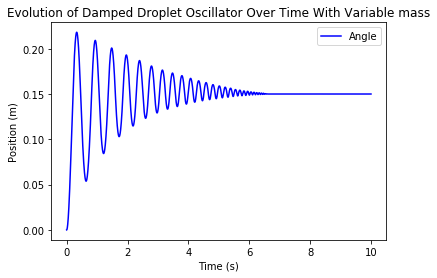

In [350]:
plt.plot(t, solution[:,0], c='b', label='Angle')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Evolution of Damped Droplet Oscillator Over Time With Variable mass')
plt.legend(loc=1)
plt.show()

In [351]:
print(times) 
print(len(times)) 
print() 
intervalz = np.empty([len(times)-1])
print(len(intervalz))

[ 0.     0.207  0.208 ...  9.998  9.999 10.   ]
6104

6103


In [352]:
a = np.array([1,2,3,4,5])
print(a) 

[1 2 3 4 5]


In [353]:
def Intervals(times): #defining interval finding function for time array 
    interval = np.empty([len(times) -1])
    for k in range(len(interval)): 
        interval[k] = times[k+1] - times[k]
    next_interval = interval[1:]
    interval = interval[0:len(times)-2]
    return interval, next_interval  
    

In [354]:
interval, next_inter = Intervals(times) 
print(interval) 
print(len(interval))
print() 
print(next_inter)
print(len(next_inter))

[0.207 0.001 0.001 ... 0.003 0.001 0.001]
6102

[0.001 0.001 0.001 ... 0.001 0.001 0.001]
6102


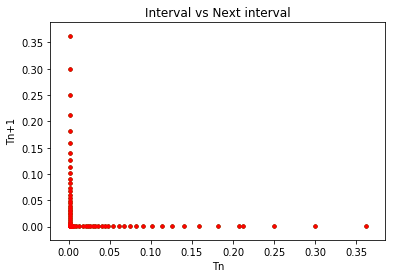

In [355]:
plt.scatter(interval, next_inter, c='r', s = 10)
plt.scatter(interval, next_inter, c='g', s = 10)
plt.scatter(interval, next_inter, c='r', s = 10)
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Tn')
plt.ylabel('Tn+1')
plt.title('Interval vs Next interval')
plt.show()

In [278]:
#run the above code for many values of R 

#graph tn on x vs r on y 

In [356]:
from matplotlib.colors import LogNorm

def CreateAttractor(t,func, Rk4, lower_range, upper_range, Runs): 
    fig, ax = plt.subplots() #Set up axes
    ax.set_xlabel('Tn')
    ax.set_ylabel('Tn+1')
    ax.set_title('Tn vs Tn+1')
    gravity_acc       = 10. # [m /s2]
    mass    = 0.001 #  test mass in [kg]
    damping_parameter = 0.00089 # viscosity of water @ room temperature [ kg /m^2]
    spring_const = .9 # arbitrary spring const. not sure what this would be in reality 
  
    m_0               = 0.001 
    delta_m           = 0.001
    x_c               = 0.0150
    initial_pos       = 0. # [m]
    initial_vel       = 0.001   # [m /s]
    N = 10000
    t = np.linspace(0., 10., N+1)
    initial_cond      = np.array([initial_pos, initial_vel])
    x = [] 
    
    Rset              = np.linspace(lower_range ,upper_range, Runs)
    
    for Rs in range(len(Rset)): 
        R = Rset[Rs]
        print(R) 
        solve_args  = {}
        solve_args['k'] = spring_const
        solve_args['m_0']  = m_0
        solve_args['g'] = gravity_acc
        solve_args['capital gamma'] = R + damping_parameter 
        solve_args['R'] = R
        #print(solve_args['R'])
        solve_args['m_0']  = m_0
        
        solution, times = Rk4(func, initial_cond, t, x_c, delta_m, solve_args)

        interval_r, next_inter_r = Intervals(times) 
        
        ax.scatter(interval,next_inter,s=10 ,c = '#666666')
    #plt.hist2d(interval, next_inter, bins=(25, 25), cmap=plt.cm.jet, norm=LogNorm())
    #plt.colorbar()
    #ax.set_xlim(0,0.5)
    #ax.set_ylim(0,0.35)
        
        


0.0001
0.00017435897435897436
0.00024871794871794874
0.00032307692307692305
0.0003974358974358974
0.0004717948717948718
0.0005461538461538462
0.0006205128205128206
0.0006948717948717949
0.0007692307692307692
0.0008435897435897437
0.000917948717948718
0.0009923076923076923
0.0010666666666666667
0.0011410256410256411
0.0012153846153846154
0.0012897435897435898
0.0013641025641025642
0.0014384615384615384
0.0015128205128205128
0.0015871794871794873
0.0016615384615384615
0.001735897435897436
0.0018102564102564103
0.0018846153846153845
0.001958974358974359
0.002033333333333333
0.0021076923076923074
0.002182051282051282
0.0022564102564102562
0.0023307692307692304
0.002405128205128205
0.0024794871794871793
0.0025538461538461535
0.002628205128205128
0.0027025641025641024
0.0027769230769230766
0.002851282051282051
0.0029256410256410254
0.003
None


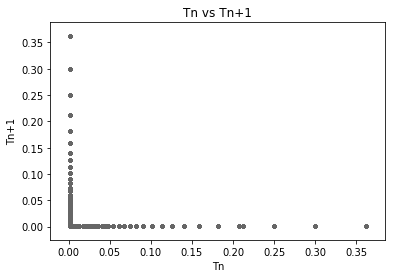

In [357]:
print(CreateAttractor(t,VariableMass_Oscillator_Drop, RungeKutta4_Drop,0.0001, 0.003,40))

In [34]:
#getting opposite effect? 

In [59]:
#plot tin vs r 

In [ ]:
#Make 3d! 
#histograms?
#bifurcation diagrams? 

In [127]:
# Low R value Attractor for single flow rate 

gravity_acc       = 10. # [m /s2]
mass    = 0.001 #  test mass in [kg]
damping_parameter = 0.0000089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = .9 # arbitrary spring const. not sure what this would be in reality 
R = 0.000006
m_0 = 0.001 
delta_m= 0.001
x_c = 0.0150

N = 100
t = np.linspace(0., 10., N+1) # [s] an array of time steps

solve_args  = {}
solve_args['k'] = spring_const
solve_args['m_0']  = m_0
solve_args['g'] = gravity_acc
solve_args['capital gamma'] = damping_parameter +R
#not applying chain rule above
solve_args['R'] = R
solve_args['m_0']  = m_0
print(solve_args['R'])
initial_pos    = 0. # [m]
initial_vel = 0.0001   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

solution, times1 = RungeKutta4_Drop(VariableMass_Oscillator_Drop, initial_cond, t, x_c, delta_m, solve_args)




6e-06


C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


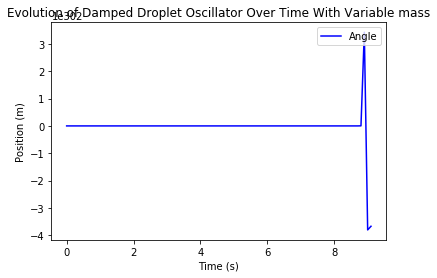

In [128]:
plt.plot(t, solution[:,0], c='b', label='Angle')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Evolution of Damped Droplet Oscillator Over Time With Variable mass')
plt.legend(loc=1)
plt.show()

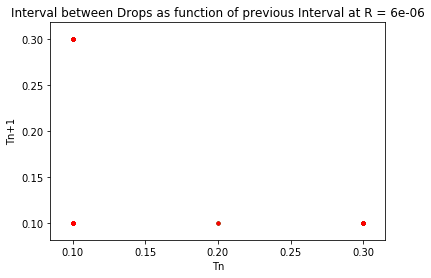

In [129]:
interval, next_inter = Intervals(times1) 

plt.scatter(interval, next_inter, c='r', s = 10)
plt.scatter(interval, next_inter, c='g', s = 10)
plt.scatter(interval, next_inter, c='r', s = 10)
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Tn')
plt.ylabel('Tn+1')
plt.title('Interval between Drops as function of previous Interval at R = {}' .format(R))
plt.show()